In [15]:
from PIL import Image
# from PIL.ExifTags impor
import numpy as np
import matplotlib.colorbar as colorbar
import matplotlib.pyplot as plt
import nanofilm
from nanofilm.ndimage import imread
import matplotlib.animation as animation
import pandas as pd
import os
import re
import pickle

%matplotlib tk

In [23]:
data = np.genfromtxt(r"C:\Users\lb958\Data\2023_01_25_Cu_120C\sample.txt",skip_header=2)
wavelengths = data[:,0]
psi= data[:,6]
delta = data[:,5]

plt.plot(wavelengths,delta,label = "$\Delta$")
plt.plot(wavelengths,psi,label='$\Psi$')
plt.xlabel('Wavelength (nm)')
plt.ylabel('$\Delta$ / $\Psi$ (Degrees $^o$)')
plt.title("Example $\Delta$ and $\Psi$ values")
plt.grid()
plt.legend()

In [14]:
disp = np.genfromtxt(r"C:\Users\lb958\OneDrive - University of Cambridge\Documents\Mini Project 1\cu2o_disp.csv",delimiter=',',skip_header=1)
wavelengths = disp[:,0][:70]*1000
ref_index = disp[:,1][:70]
k_values = disp[:,2][:70]

plt.plot(wavelengths,ref_index,label = "Refractive index $n$")
plt.plot(wavelengths,k_values,label='Extinction coefficient $k$')
plt.xlabel('Wavelength (nm)')
plt.ylabel('Optical constants')
plt.title("Optical constants of Cu$_2$O")
plt.grid()
plt.legend()

# plt.plot(wavelengths,k_values)


In [74]:
for mins in [i*30 for i in range(13)]:    
    with (open(r"C:\Users\lb958\Code\mini_project_1\Cu-Gr_tile_115C_results\cu2o_thickness_arr_png_{}mins_115C.pkl".format(mins),'rb')) as f:
        thickness_myfit_arr = pickle.load(f)
# plt.imshow(thickness_myfit_arr)
    print(thickness_myfit_arr.mean())
# plt.show()


# with (open("stderr_arr_png.pkl",'rb')) as f:
#     stderr_myfit_arr = pickle.load(f)
# plt.imshow(stderr_myfit_arr)
# plt.show()

0.008329915009827615
0.013661507569838081
0.019155240229052847
0.026474261242046406
0.029873588313044725
0.0325511912239698
0.052504779790718936
0.07373907106707185
0.1187177823552003
0.1483804316520853
0.2593402534177518
0.38140336142318687
0.5466738292409462


In [80]:
for mins in [i*30 for i in range(13)]:
    with (open(r"C:\Users\lb958\Code\mini_project_1\Cu_tile_115C_results\thickness_arr_png_{}mins_115C.pkl".format(mins),'rb')) as f:
        thickness_myfit_arr = np.fliplr(pickle.load(f))/10.0
    fig, ax = plt.subplots()

    im = ax.imshow(thickness_myfit_arr,cmap='afmhot',extent=(0,580,0,500))
    im.set_clim(0,25.0)
    # cbar = plt.colorbar(thickness_myfit_arr)
    cbar = plt.colorbar(im)
    cbar.set_label('Cu oxide thickness (nm)')
    ax.set_title(f"Cu$_2$O thickness after {mins} min oxidation at 115 $^o$C")

    ax.set_xlabel("Length ($\mu m$)")
    ax.set_ylabel("Length ($\mu m$)")
    plt.savefig(r"C:\Users\lb958\OneDrive - University of Cambridge\Documents\Mini Project 1\report\images\thickness_{}min_bare.png".format(mins))

In [81]:
for mins in [i*30 for i in range(13)]:
    with (open(r"C:\Users\lb958\Code\mini_project_1\Cu-Gr_tile_115C_results\graphene_thickness_arr_png_{}mins_115C.pkl".format(mins),'rb')) as f:
        thickness_myfit_arr = np.fliplr(pickle.load(f))/10.0
    fig, ax = plt.subplots(figsize=(8,6))
    
    im = ax.imshow(thickness_myfit_arr,cmap='afmhot',extent=(0,580,0,500))
    im.set_clim(0,1.0)
    # cbar = plt.colorbar(thickness_myfit_arr)
    cbar = plt.colorbar(im)
    cbar.set_label('Cu oxide thickness (nm)')
    ax.set_title(f"Cu$_2$O thickness under graphene after {mins} min oxidation at 115 $^o$C")

    ax.set_xlabel("Length ($\mu m$)")
    ax.set_ylabel("Length ($\mu m$)")
    plt.savefig(r"C:\Users\lb958\OneDrive - University of Cambridge\Documents\Mini Project 1\report\images\thickness_{}min_covered.png".format(mins))

In [ ]:
indices_1 = [[50,100],[50,100]]
indices_2 = [[260,300],[50,100]]
indices_3 = [[360,390],[50,100]]
indices_4 = [[150,200],[210,250]]
indices_5 = [[275,325],[275,325]]
indices_6 = [[5,25],[280,310]]
indices_7 = [[75,125],[320,340]]
indices_8 = [[180,210],[325,340]]

indices_regions = [indices_1,indices_2,indices_3,indices_4,indices_5,indices_6,indices_7,indices_8]

#RGBA values for the 8 different regions
colour_1 = (175,118,255)
colour_2 = (83,255,205)
colour_3 = (26,255,230)
colour_4 = (255,170,117)
colour_5 = (169,255,111)
colour_6 = (210,70,255)
colour_7 = (255,43,21)
colour_8 = (43,255,143)

colours_regions = [colour_1,colour_2,colour_3,colour_4,colour_5,colour_6,colour_7,colour_8]

for i in range(len(colours_regions)):
    colours_regions[i] = np.array(colours_regions[i])/255


for i in range(len(indices_regions)):
    region_array = thickness_myfit_arr[indices_regions[i][1][0]:indices_regions[i][1][1],indices_regions[i][0][0]:indices_regions[i][0][1]]/10
    # print(region_array)
    # print("Region {} thickness = {} +/- {} nm".format(i+1,region_array.mean(),region_array.std()))

NameError: name 'thickness_myfit_arr' is not defined

In [ ]:
all_regions_thickvstime = []
all_regions_std = []
times = [i*30 for i in range(13)]
for i in range(len(indices_regions)):
    region_thickvstime = []
    region_stderr = []
    for mins in times:    
        with (open(r"C:\Users\lb958\Code\mini_project_1\Cu_tile_115C_results\thickness_arr_png_{}mins_115C.pkl".format(mins),'rb')) as f:
            thickness_arr = np.fliplr(pickle.load(f))
        with (open(r"C:\Users\lb958\Code\mini_project_1\Cu_tile_115C_results\stderr_arr_png_{}mins_115C.pkl".format(mins),'rb')) as f:
            stderr_arr = np.fliplr(pickle.load(f))
        # print(mins)
        region_array = thickness_arr[indices_regions[i][1][0]:indices_regions[i][1][1],indices_regions[i][0][0]:indices_regions[i][0][1]]/10
        region_stderr_array = stderr_arr[indices_regions[i][1][0]:indices_regions[i][1][1],indices_regions[i][0][0]:indices_regions[i][0][1]]/10
        # print(region_array)
        mean_thick = region_array.mean()
        std_thick = region_array.std()
        # print("Region {} thickness at {} mins = {} +/- {} nm".format(i+1,mins,region_array.mean(),region_array.std()))
        region_thickvstime.append(mean_thick)
        region_stderr.append(std_thick)
    # print(len(region_thickvstime))
    all_regions_thickvstime.append(region_thickvstime)
    all_regions_std.append(region_stderr)

fig = plt.figure()
ax = plt.subplot(111)
# for i in range(len(all_regions_thickvstime)):
#     # print(thickvstime)
#     ax.errorbar(times,all_regions_thickvstime[i],yerr = all_regions_std[i], color=colours_regions[i], marker='o', linestyle='dashed',capsize=3,label=f"Region {i+1}")
# ax.set_xticks(times)
# ax.grid(True)
# # Shrink current axis by 20%
# box = ax.get_position()
# ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])

# # Put a legend to the right of the current axis
# # ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# ax.legend(loc=(1.01,0.5))
# ax.set_xlabel("Time (min)")
# ax.set_ylabel("Oxide thickness (nm)")
# ax.set_title("Oxide thickness for different crystal surfaces over time")
# fig.savefig("thickness_v_time_errbar_legend.png",bbox_inches='tight')
# plt.show()

# This will plot inverse logarithm law proposed by Cabrera and Mott
times = np.array(times)*60 #converting from mins to secs
fig = plt.figure()
ax = plt.subplot(111)
for i in range(len(all_regions_thickvstime)):
    # print(thickvstime)
    thickvstime = np.array(all_regions_thickvstime[i])
    
    recip = np.reciprocal(thickvstime)
    thick_square = thickvstime**2
    # print(recip)
    log_times = np.log(times)
    # print(log_times)

    #very thin film inverse log law
    a,b = np.polyfit(log_times[1:],recip[1:],1) # slicing to avoid -inf

    #thin film parabolic law
    # a,b = np.polyfit(log_times[4:-1],np.log(thick_square[4:-1]),1) # slicing to avoid -inf


    print("Region {} fit: Slope = {}, intercept = {}".format(i+1,a,b))
    ax.scatter(log_times[1:],recip[1:],facecolors='none',edgecolors=colours_regions[i],label=f"Region {i+1}")

    # ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

    # plt.scatter(log_times,np.log(thick_square),facecolors='none',edgecolors=colours_regions[i])
    # # print(recip)
    x = np.linspace(np.amin(log_times[1:-1]),np.amax(log_times[1:-1]),100)
    # x = np.linspace(np.amin(log_times[4:]),np.amax(log_times[4:]),100)

    # print(x)
    ax.plot(x,b+a*x,'--',color=colours_regions[i])

ax.grid(True)
# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc=(1.01,0.5))
ax.set_xlabel("ln(Time)")
ax.set_ylabel("1/X (nm$^{-1}$)")
ax.set_title("Fit of data to Cabrera-Mott model")
fig.savefig("cabrera-mott_fit.png",bbox_inches='tight')
plt.show()
# plt.show()

Region 1 fit: Slope = -0.02094493371156895, intercept = 0.35697091349247684
Region 2 fit: Slope = -0.01764202393319943, intercept = 0.2611104148881399
Region 3 fit: Slope = -0.013624293127431105, intercept = 0.20529335265866044
Region 4 fit: Slope = -0.017762910282633465, intercept = 0.3004786859254794
Region 5 fit: Slope = -0.012443722450009163, intercept = 0.19137118789280363
Region 6 fit: Slope = -0.020349134598453233, intercept = 0.3457098550342092
Region 7 fit: Slope = -0.014499171839876417, intercept = 0.21880761864065423
Region 8 fit: Slope = -0.017701504384008703, intercept = 0.2615475671286642


C:\Users\lb958\AppData\Local\Temp\ipykernel_2244\997343062.py:56: RuntimeWarning: divide by zero encountered in log
  log_times = np.log(times)


Exception in Tkinter callback
Traceback (most recent call last):
  File "C:\Users\lb958\AppData\Local\Programs\Python\Python311\Lib\tkinter\__init__.py", line 1948, in __call__
    return self.func(*args)
           ^^^^^^^^^^^^^^^^
  File "C:\Users\lb958\AppData\Local\Programs\Python\Python311\Lib\tkinter\__init__.py", line 861, in callit
    func(*args)
  File "c:\Users\lb958\Code\mini_project_1\.venv\Lib\site-packages\matplotlib\backends\_backend_tk.py", line 537, in delayed_destroy
    self.window.destroy()
  File "C:\Users\lb958\AppData\Local\Programs\Python\Python311\Lib\tkinter\__init__.py", line 2368, in destroy
    self.tk.call('destroy', self._w)
_tkinter.TclError: can't invoke "destroy" command: application has been destroyed


In [ ]:
imagename = r"C:\Users\lb958\Data\2022_12_06_Cu_in_air_run_01\maps\Thickness_maps\Run_02\Cu_tile_100C_air_0_min_003.png"
# image = Image.open(imagename)

(350, 407)
[[3.5 3.6 3.6 ... 3.6 3.5 4.9]
 [3.5 3.5 3.4 ... 3.3 3.3 4.8]
 [3.4 3.3 3.4 ... 3.4 3.5 4.8]
 ...
 [3.3 3.6 3.9 ... 4.9 5.  7.6]
 [3.3 3.9 4.4 ... 5.3 4.7 7.5]
 [0.  0.  0.  ... 0.  0.  6.9]]


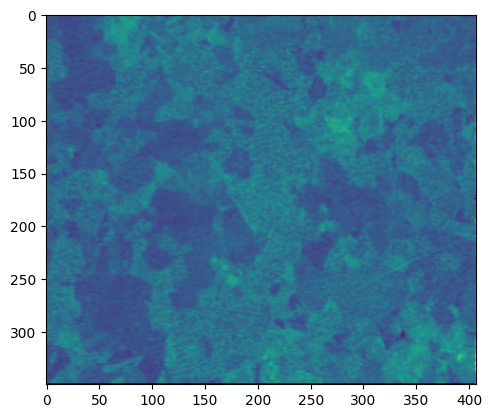

In [ ]:
image_array = imread(imagename)
print(image_array.shape)
print(image_array)
plt.imshow(image_array)

In [ ]:
class ImageData():
    """
    This is a class which utilises the image data exported by a 
    Accurion DataStudio fit of ellipsometry data in a more 
    convenient format
    """
    def __init__(self,image_path : str,time : int):
        """
        This is the constructer of the ImageData object

        Args:
            image_path (str): a path to the PNG image data given by a
            fit to ellipsometry data
            min (float): the minimum thickness value measured
            max (float): the maximum thickness value measured
            time (int): the time into the measurement this image was taken
            e.g. if the image was taken after 30 mins of measurement make this
            30 NOTE: this may be changed in the future to work with seconds 
            rather than minutes if required
        """
        self.image_path = image_path
        self.min = min
        self.max = max
        self.time = time
        # temp_image = Image.open(image_path)
        self.array = imread(image_path) # A NumPy array of the data PNG
        # temp_image.close() # if I don't close it again it will never let me construct another of these objects
        # below uses the provided min and max values for thickness and scales the image array to these values
        #self.real_array = self.raw_array*(self.max/np.amax(self.raw_array))

    def plot(self,title : str = "",max_thickness : int or float = None):
        """
        Plots a basic thickness map of the data
        Args:
            title (str, optional): Plot title. Defaults to "".
        """
        fig, ax = plt.subplots()
        pos = ax.imshow(self.array,cmap='viridis',extent=(0,580,0,500))
        fig.colorbar(pos)
        if type(max_thickness) == int or type(max_thickness) == float:
            pos.set_clim(0,max_thickness)

        if title == "":
            title = "Thickness plot after time = {} units".format(self.time)
        ax.set_title(title)
        fig.show()

    def return_image(self, ax):
        """
        This is for when plotting an animated graph we need to return an
        image object of the type im = ax.imshow() from matplotlib
        Args:
            ax (ax): This is a matplotlib.axes object, as returned when doing
            fig, ax = plt.subplots()
        """
        im = ax.imshow(self.array,animated = True,extent=(0,580,0,500))
        return im


In [ ]:
image1 = ImageData(imagename,0)
thickness_0min = image1.array


C:\Users\lb958\AppData\Local\Temp\ipykernel_6088\3338622489.py:46: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


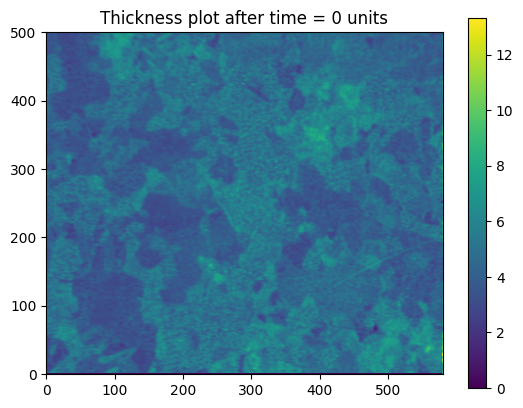

In [ ]:
image1.plot()

In [ ]:
path_150C_120 = r"C:\Users\lb958\Data\2023_01_11_Cu_150C\maps\thickness_map\Cu_150C_120_003.png"
imagedata_150C_120 = ImageData(path_150C_120,120)
imagedata_150C_120.array.shape

(350, 407)

C:\Users\lb958\AppData\Local\Temp\ipykernel_6088\3338622489.py:46: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


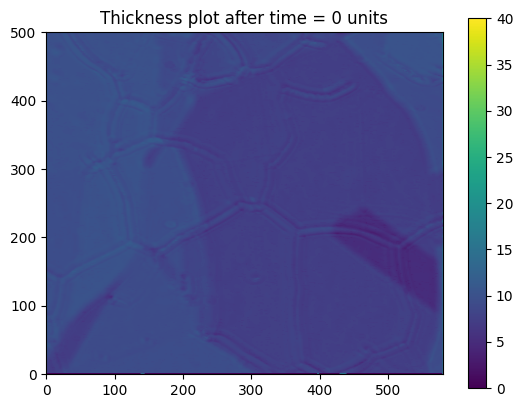

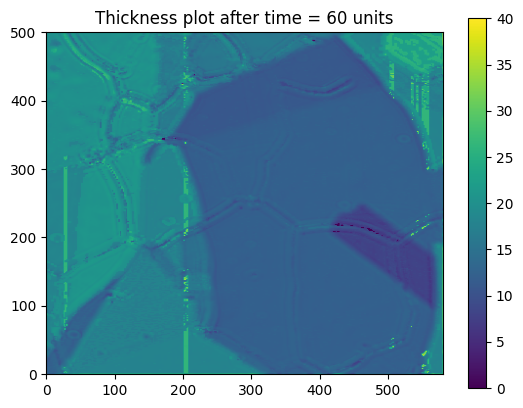

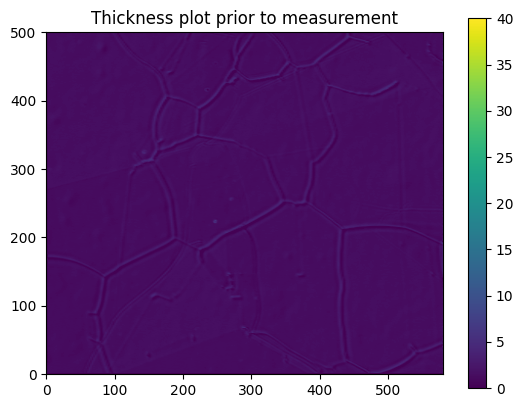

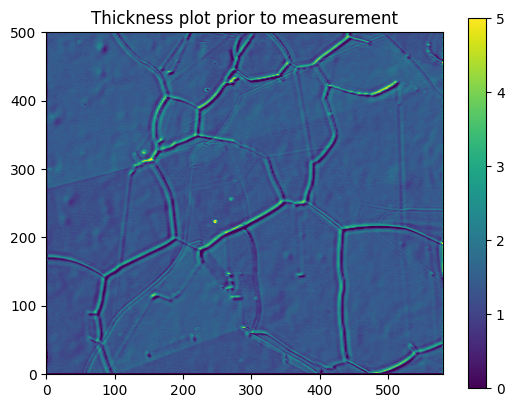

In [ ]:
path_150C_0 = r"C:\Users\lb958\Data\2023_01_11_Cu_150C\maps\thickness_map\Cu_150C_0_003.png"
path_150C_60 = r"C:\Users\lb958\Data\2023_01_11_Cu_150C\maps\thickness_map\Cu_150C_60_003.png"
path_150C_prior = r"C:\Users\lb958\Data\2023_01_11_Cu_150C\maps\thickness_map\Cu_Tile_3wavelengthmap_thickness_003.png"
imagedata_150C_0 = ImageData(path_150C_0,0)
imagedata_150C_0.plot(max_thickness=40)
imagedata_150C_60 = ImageData(path_150C_60,60)
imagedata_150C_60.plot(max_thickness=40)

imagedata_150C_prior = ImageData(path_150C_prior,0)
imagedata_150C_prior.plot(max_thickness=40,title="Thickness plot prior to measurement")
imagedata_150C_prior.plot(max_thickness=5,title="Thickness plot prior to measurement")



In [ ]:
def relative_growth_rate(image_before : ImageData, image_after : ImageData,
title = None,color_lim = None,saveas = None):
    """
    Plot an image of growth rates for different pixels
    Args:
        image1 (ImageData): One object of ImageData at a given time 
        image2 (ImageData): Object of ImageData at a later time
    """
    thickness_change = image_after.array - image_before.array
    thickness_change[thickness_change<0] = 0
    fig, ax = plt.subplots()
    pos = ax.imshow(thickness_change,extent=(0,580,0,500))
    fig.colorbar(pos)
    if type(title) == str:
        ax.set_title(title)
    if type(color_lim) == int or type(color_lim) == float:
        pos.set_clim(0,color_lim)
    mean_change = np.mean(thickness_change)
    max_change = np.amax(thickness_change)
    min_change = np.amin(thickness_change)
    print("Mean change = {}, Max change = {}, Min change = {}".format(mean_change,max_change,min_change))
    if type(saveas) == str:
        fig.savefig(saveas,bbox_inches='tight')
    

Mean change = 2.6328866481781006, Max change = 14.5, Min change = 0.0


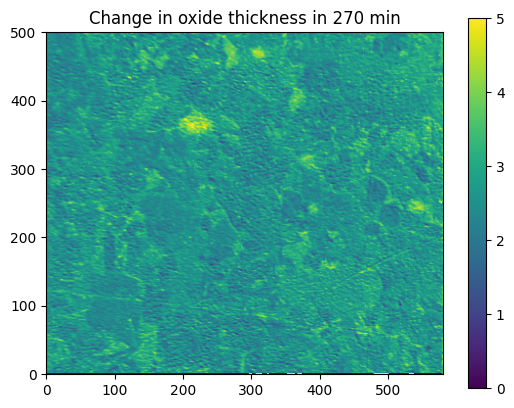

In [ ]:
image_0min_path = r"C:\Users\lb958\Data\2022_12_06_Cu_in_air_run_01\maps\Thickness_maps\Run_02\Cu_tile_100C_air_0_min_003.png"
image_30min_path = r"C:\Users\lb958\Data\2022_12_06_Cu_in_air_run_01\maps\Thickness_maps\Run_02\Cu_tile_100C_air_30_min_003.png"
image_60min_path = r"C:\Users\lb958\Data\2022_12_06_Cu_in_air_run_01\maps\Thickness_maps\Run_02\Cu_tile_100C_air_60_min_003.png"
image_90min_path = r"C:\Users\lb958\Data\2022_12_06_Cu_in_air_run_01\maps\Thickness_maps\Run_02\Cu_tile_100C_air_90_min_003.png"
image_150min_path = r"C:\Users\lb958\Data\2022_12_06_Cu_in_air_run_01\maps\Thickness_maps\Run_02\Cu_tile_100C_air_150_min_003.png"
image_180min_path = r"C:\Users\lb958\Data\2022_12_06_Cu_in_air_run_01\maps\Thickness_maps\Run_02\Cu_tile_100C_air_180_min_003.png"
image_270min_path = r"C:\Users\lb958\Data\2022_12_06_Cu_in_air_run_01\maps\Thickness_maps\Run_02\Cu_tile_100C_air_270_min_003.png"
image_0min_data = ImageData(image_0min_path,0)
image_270min_data = ImageData(image_270min_path,270)
relative_growth_rate(image_0min_data,image_270min_data,title="Change in oxide thickness in 270 min",color_lim=5)

In [ ]:

plt.rcParams['animation.ffmpeg_path'] ='C:\\ffmpeg\\bin\\ffmpeg.exe'

from matplotlib_scalebar.scalebar import ScaleBar
data_list = [(image_0min_path,0),(image_30min_path,30),(image_60min_path,60),(image_90min_path,90),
            (image_150min_path,150),(image_180min_path,180),(image_270min_path,270)]

def get_im_width(image_path : str):
    try:
        image_array = imread(image_path)
        return np.shape(image_array)[1]

    except Exception:
        with (open(image_path,'rb')) as f:
            image_array = pickle.load(f)
            return np.shape(image_array)[1]

def get_im_height(image_path : str):
    try:
        image_array = imread(image_path)
        return np.shape(image_array)[0]

    except Exception:
        with (open(image_path,'rb')) as f:
            image_array = pickle.load(f)
            return np.shape(image_array)[0]

def thickness_movie(data_list : list,max_thickness : int or float= None,
                    saveas : str = None, ms_per_frame : int = 1000):

    example_path = data_list[0][0]
    im_width = get_im_width(example_path)
    print(im_width/580)
    im_height = get_im_height(example_path)

    fig, ax = plt.subplots()
    
    im_list = [[ImageData(path,time).return_image(ax) ,    ax.text(0.5, 1.05, 
                "Oxidation time: {} min".format(time),
                # bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 5},
                transform=ax.transAxes, ha="center")] for path,time in data_list]

    if type(max_thickness) == float or type(max_thickness) == int: 
        for im in im_list:
            im[0].set_clim(0,max_thickness)

    ani = animation.ArtistAnimation(fig, im_list, interval=ms_per_frame, blit=True,
                                    repeat_delay=1000)

    cbar = plt.colorbar(im_list[-1][0])
    cbar.set_label('Cu oxide thickness (nm)')

    ax.set_xlabel("Length ($\mu m$)")
    ax.set_ylabel("Length ($\mu m$)")

    # scalebar = ScaleBar()

    if type(saveas) == str:
        writer = animation.FFMpegWriter(
            fps=1, metadata=dict(artist='Larry Brazel'), bitrate=1800)
    
        ani.save(saveas, writer=writer)

thickness_movie(data_list,max_thickness=15,saveas='test.mp4')

NameError: name 'image_0min_path' is not defined

In [ ]:

def rate_movie(data_list : list,max_rate : int or float= None,
                    saveas : str = None, ms_per_frame : int = 1000):

    example_path = data_list[0][0]
    im_width = get_im_width(example_path)
    print(im_width/580)
    im_height = get_im_height(example_path)

    fig, ax = plt.subplots()

    im_list = []
    for i in range(len(data_list)-1):
        path_begin = data_list[i][0]
        time_begin = data_list[i][1]
        path_final = data_list[i+1][0]
        time_final = data_list[i+1][1]
        
        rate_array = ImageData(path_final,time_final).array-ImageData(path_begin,time_begin).array 
        im = ax.imshow(rate_array,animated = True,extent=(0,580,0,500))
        im_list.append([im,ax.text(150, 505, 
                "Rate between {} - {} min".format(time_begin,time_final))])


    if type(max_rate) == float or type(max_rate) == int: 
        for im in im_list:
            im[0].set_clim(0,max_rate)

    ani = animation.ArtistAnimation(fig, im_list, interval=ms_per_frame, blit=True,
                                    repeat_delay=1000)

    cbar = plt.colorbar(im_list[-1][0])
    cbar.set_label('Cu oxide thickness change (nm)')

    ax.set_xlabel("Length ($\mu m$)")
    ax.set_ylabel("Length ($\mu m$)")

    # scalebar = ScaleBar()

    if type(saveas) == str:
        writer = animation.FFMpegWriter(
            fps=1, metadata=dict(artist='Larry Brazel'), bitrate=1800)
    
        ani.save(saveas, writer=writer)

    def return_image(self, ax):
        """
        This is for when plotting an animated graph we need to return an
        image object of the type im = ax.imshow() from matplotlib
        Args:
            ax (ax): This is a matplotlib.axes object, as returned when doing
            fig, ax = plt.subplots()
        """
        im = ax.imshow(self.array,animated = True,extent=(0,580,0,500))
        return im


In [ ]:
data_list = generate_data_paths(r"C:\Users\lb958\Data\2023_01_11_Cu_150C\maps\thickness_map")
rate_movie(data_list=data_list,max_rate = 10, saveas = '150C_rate_movie.mp4')

NameError: name 'generate_data_paths' is not defined

Mean change = 6.848636150360107, Max change = 27.700000762939453, Min change = 0.0
Mean change = 6.099440574645996, Max change = 100.0, Min change = 0.0


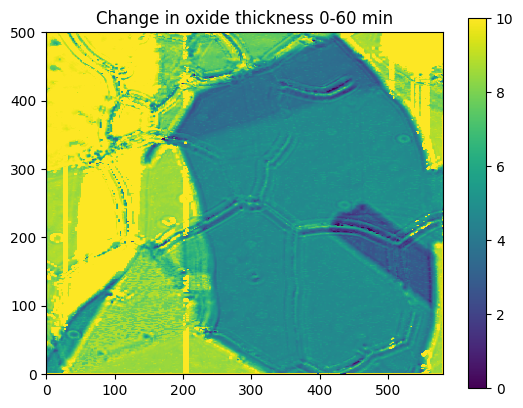

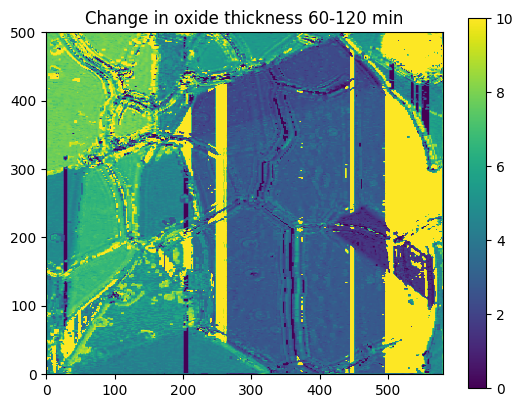

In [ ]:
relative_growth_rate(ImageData(data_list[0][0],data_list[0][1]),ImageData(data_list[1][0],data_list[1][1]),title="Change in oxide thickness 0-60 min",color_lim=10,saveas="growth_rate_150C_1.png")
relative_growth_rate(ImageData(data_list[1][0],data_list[1][1]),ImageData(data_list[2][0],data_list[2][1]),title="Change in oxide thickness 60-120 min",color_lim=10,saveas="growth_rate_150C_2.png")

In [ ]:
# function to generate list of paths in to 
# Accurion data png given a folder which contains them 
def generate_data_paths(folder_path : str):
    walk_list = os.listdir(folder_path) # returns all items in folder at folder_path
    accurion_path_list = []
    for item in walk_list:
        # checks if the last characters match those of the Accurion fitted data files
        if item[-6:] == "03.png":
            # uses regex to find the instance of JUST numbers enclosed in two underscores
            try:
                match_obj = re.findall("_[0-9]+_",item)
                match_str = match_obj[0] # gets the string of the match
                # print(match_str)
                time = int(match_str[1:-1]) #removes _ and converts to int

                accurion_path_list.append((os.path.join(folder_path,item),time))
            except Exception:
                pass
    
    #sorts list based off time

    # sorts the list in ascending order of time and returns
    return sorted(accurion_path_list, key = lambda x: x[1])

# generate_data_paths(r"C:\Users\lb958\Data\2022_12_06_Cu_in_air_run_01\maps\Thickness_maps\Run_02")

In [ ]:
def generate_pickle_paths(folder_path:str, opening = "thi"):
    walk_list = os.listdir(folder_path) # returns all items in folder at folder_path
    pickle_list = []
    # print(walk_list)
    for item in walk_list:
        # checks if the last characters match those of the Accurion fitted data files
        if item[0:3] == opening:
            # uses regex to find the instance of JUST numbers enclosed in two underscores
            try:
                #incredibly janky way to ensure filename contains thickness
                thickness_test = re.findall("thickness",item)
                thickness_tester = thickness_test[0]
                match_obj = re.findall("png_[0-9]+mins_",item)
                match_str = match_obj[0] # gets the string of the match

                time = int(match_str[4:-5]) #removes _ and mins_ and converts to int
                pickle_list.append((os.path.join(folder_path,item),time))
            except Exception:
                pass
    return sorted(pickle_list, key = lambda x: x[1])

# generate_pickle_paths(r"C:\Users\lb958\Code\mini_project_1\Cu_tile_115C_results")

In [ ]:
def get_pickle_im_width(image_path : str):
    with (open(image_path,'rb')) as f:
        image_array = pickle.load(f)
    return np.shape(image_array)[1]

def get_pickle_im_height(image_path : str):
    with (open(image_path,'rb')) as f:
        image_array = pickle.load(f)
    return np.shape(image_array)[0]

def thickness_pickle_movie(data_list : list,max_thickness : int or float= None,
                    saveas : str = None, ms_per_frame : int = 1000):
    example_path = data_list[0][0]
    im_width = get_pickle_im_width(example_path)
    im_height = get_pickle_im_height(example_path)

    fig, ax = plt.subplots()
    im_list = []
        # im_list = [[ImageData(path,time).return_image(ax) ,    ax.text(0.5, 1.05, 
        #         "Oxidation time: {} min".format(time),
        #         # bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 5},
        #         transform=ax.transAxes, ha="center")] for path,time in data_list]
        #     im = ax.imshow(self.array,animated = True,extent=(0,580,0,500))
    
    for path,time in data_list:
        with open(path, 'rb') as f:
            image_array = pickle.load(f)
        image_array = image_array/10 #conv from Ang to nm
        image_array = image_array[:,::-1] #flips array horizontally
        im = ax.imshow(image_array,
                       animated = True,
                       extent=(0,580,0,500),
                       cmap='afmhot')
        im_list.append([im ,ax.text(0.5, 1.05, 
                "Oxidation time: {} min".format(time),
                # bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 5},
                transform=ax.transAxes, ha="center")])
    if type(max_thickness) == float or type(max_thickness) == int: 
        for im in im_list:
            im[0].set_clim(0,max_thickness)

    ani = animation.ArtistAnimation(fig, im_list, interval=ms_per_frame, blit=True,repeat_delay=1000)

    cbar = plt.colorbar(im_list[-1][0])
    cbar.set_label('Cu oxide thickness (nm)')

    ax.set_xlabel("Length ($\mu m$)")
    ax.set_ylabel("Length ($\mu m$)")

    # scalebar = ScaleBar()

    if type(saveas) == str:
        writer = animation.FFMpegWriter(
            fps=1, metadata=dict(artist='Larry Brazel'), bitrate=1800)
    
        ani.save(saveas, writer=writer)

In [ ]:
data_list = generate_pickle_paths(r"C:\Users\lb958\Code\mini_project_1\Cu_tile_115C_results")
# print(data_list)
# with open(data_list[0][0],'rb') as f:
#     image_array = pickle.load(f)
# fig, ax = plt.subplots()
# ax.imshow(image_array,)
# fig.show()
# print("generating movie")
thickness_pickle_movie(data_list=data_list,saveas="thickness_movie_sample2_bare.mp4",max_thickness=20)

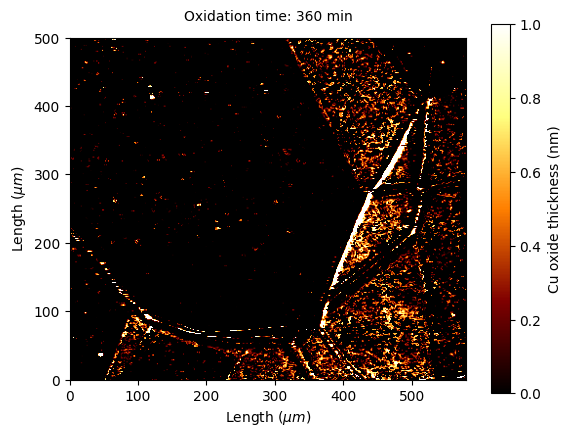

In [ ]:
data_list_gr = generate_pickle_paths(r"C:\Users\lb958\Code\mini_project_1\Cu-Gr_tile_115C_results",opening='Cu2')
# print(data_list)
# with open(data_list[0][0],'rb') as f:
#     image_array = pickle.load(f)
# fig, ax = plt.subplots()
# ax.imshow(image_array,)
# fig.show()
# print("generating movie")
thickness_pickle_movie(data_list=data_list_gr,saveas="thickness_movie_sample2_graphene.mp4",max_thickness=1)

In [ ]:
def rate_pickle_movie(data_list : list,max_rate : int or float= None,
                    saveas : str = None, ms_per_frame : int = 1000):

    example_path = data_list[0][0]
    im_width = get_pickle_im_width(example_path)
    print(im_width/580)
    im_height = get_pickle_im_height(example_path)

    fig, ax = plt.subplots()

    im_list = []
    for i in range(len(data_list)-1):
        with open(data_list[i][0],'rb') as f:
            array_begin = pickle.load(f)/10
        with open(data_list[i+1][0],'rb') as f:
            array_final = pickle.load(f)/10
        time_begin = data_list[i][1]
        time_final = data_list[i+1][1]
        
        rate_array = array_final-array_begin
        im = ax.imshow(rate_array,animated = True,extent=(0,580,0,500),
                       cmap='')
        im_list.append([im,ax.text(150, 505, 
                "Rate between {} - {} min".format(time_begin,time_final))])


    if type(max_rate) == float or type(max_rate) == int: 
        for im in im_list:
            im[0].set_clim(0,max_rate)

    ani = animation.ArtistAnimation(fig, im_list, interval=ms_per_frame, blit=True,
                                    repeat_delay=1000)

    cbar = plt.colorbar(im_list[-1][0])
    cbar.set_label('Cu oxide thickness change (nm)')

    ax.set_xlabel("Length ($\mu m$)")
    ax.set_ylabel("Length ($\mu m$)")

    # scalebar = ScaleBar()

    if type(saveas) == str:
        writer = animation.FFMpegWriter(
            fps=1, metadata=dict(artist='Larry Brazel'), bitrate=1800)
    
        ani.save(saveas, writer=writer)

In [ ]:
rate_pickle_movie(data_list=data_list,max_rate=7.5,saveas='rate_movie_sample2_bare.mp4')

0.7017241379310345


0.7017241379310345
Mean change = 0.7515289187431335, Max change = 4.199999809265137, Min change = 0.0


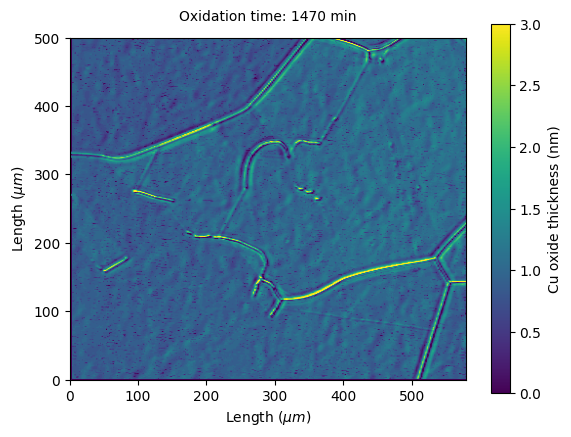

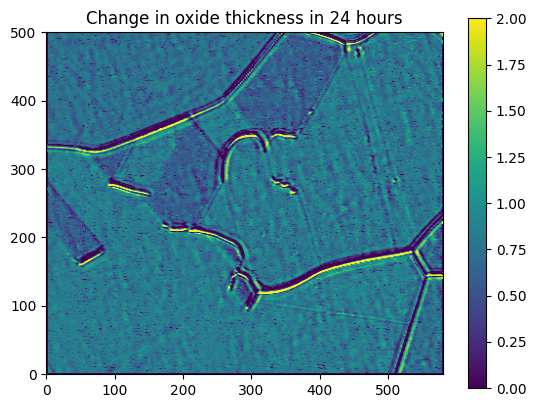

In [ ]:
data_list = generate_data_paths(r"C:\Users\lb958\Data\2022_12_16_Cu_in_air_run_02\maps\thickness_maps")
thickness_movie(data_list=data_list,saveas = '24_hour.mp4',max_thickness=3,
ms_per_frame=2000)
relative_growth_rate(ImageData(data_list[0][0],data_list[0][1]),ImageData(data_list[-1][0],data_list[-1][1]),title="Change in oxide thickness in 24 hours",color_lim=2,saveas="growth_rate_24hrs.png")

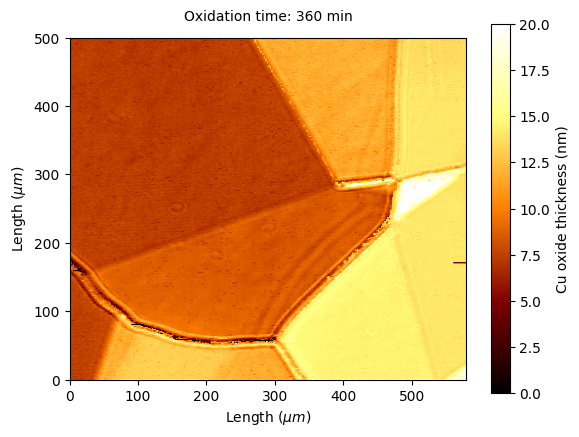

In [ ]:
data_list = generate_pickle_paths(r"C:\Users\lb958\Code\mini_project_1\Cu_tile_115C_results")
# print(data_list)
# with open(data_list[0][0],'rb') as f:
#     image_array = pickle.load(f)
# fig, ax = plt.subplots()
# ax.imshow(image_array,)
# fig.show()
# print("generating movie")
thickness_pickle_movie(data_list=data_list,saveas="thickness_movie_sample2_bare.mp4",max_thickness=20)

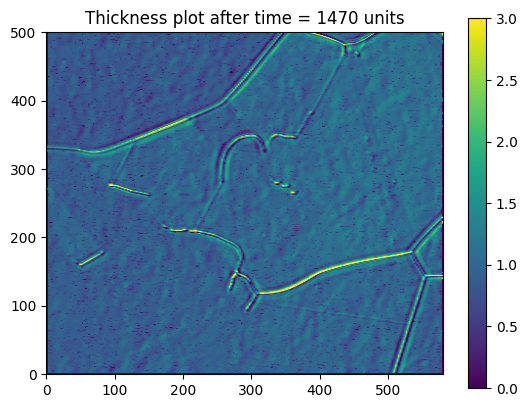

In [ ]:
sample_image_data = ImageData(data_list[-1][0],data_list[-1][1])
print(sample_image_data.array.shape)
sample_image_data.plot(max_thickness=3)

In [ ]:
from sklearn.cluster import KMeans
# from yellowbrick.cluster import KElbowVisualizer

In [ ]:
def image_to_X(image_path : str):
    image_array = imread(image_path)
    width = get_im_width(image_path)
    height = get_im_height(image_path)
    print("Width = {}, Height = {}".format(width,height))
    image_array = image_array.reshape(height*width,1)
    print(image_array.shape)
    image_array = np.pad(image_array,(0,2),)[0:-2]
    print(image_array.shape)
    x = 0.0
    y = 0.0
    for pixel in image_array:
        pixel[1] = x
        pixel[2] = y
        x+=1
        if x == width:
            x=0
            y+=1
    return image_array

        

image_path_1470min = r"C:\Users\lb958\Data\2022_12_16_Cu_in_air_run_02\maps\thickness_maps\Cu_50C_0_run01_003.png"


#Have defined these twice lol
# def get_im_width(image_path : str):
#     image_array = imread(image_path)
#     return np.shape(image_array)[1]

# def get_im_height(image_path : str):
#     image_array = imread(image_path)
#     return np.shape(image_array)[0]

def X_to_image(image_data : np.ndarray,image_path : str):
    width = get_im_width(image_path)
    height = get_im_height(image_path)
    return np.reshape(image_data[:,0],[height,width,1])



# image_data = image_to_X(image_path_1470min)
image_data2 = image_to_X(image_150min_path)
image_data_150C_60 = image_to_X(path_150C_60)


# km = KMeans()
# visualizer = KElbowVisualizer(km,k=(2,20))
# visualizer.fit(image_data)
# visualizer.show()

    

Width = 407, Height = 350
(142450, 1)
(142450, 3)
Width = 407, Height = 350
(142450, 1)
(142450, 3)


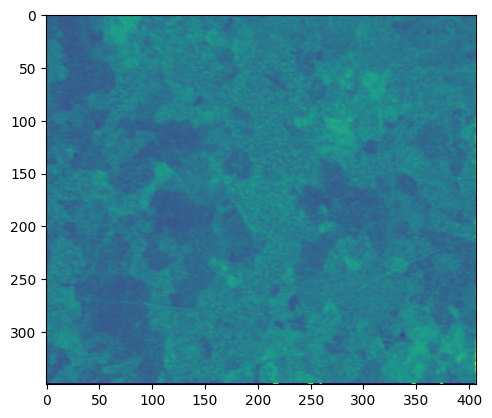

c:\Users\lb958\Code\mini_project_1\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


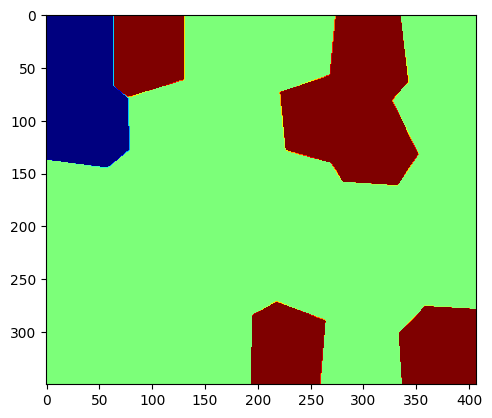

In [ ]:
# print(image_data2)
plswork_array = ImageData(image_150min_path,150).array
plt.imshow(plswork_array)
plt.show()


C:\Users\lb958\AppData\Local\Temp\ipykernel_4720\3684015916.py:46: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
c:\Users\lb958\Code\mini_project_1\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


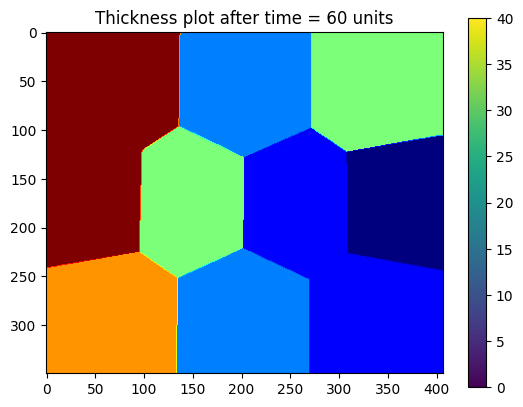

In [ ]:
imagedata_150C_60 = ImageData(path_150C_60,60)
imagedata_150C_60.plot(max_thickness=40)
km = KMeans(n_clusters = 10)
km.fit(image_data_150C_60)
X_km = km.cluster_centers_[km.predict(image_data_150C_60)]
X_km = X_km.astype("uint8")

img_km = X_to_image(X_km,path_150C_60)
plt.imshow(img_km,cmap="jet")
plt.show()

In [ ]:
def segment_image(image_path, n_clusters):
    image_data = image_to_X(image_path)
    km = KMeans(n_clusters = n_clusters)
    km.fit(image_data)
    X_km = km.cluster_centers_[km.predict(image_data)]
    X_km = X_km.astype("uint8")
    original_array = imread(image_path)
    img_km = X_to_image(X_km,image_path)
    fig, (ax1,ax2) = plt.subplots(1,2)
    
    ax1.imshow(original_array)
    ax2.imshow(img_km)
    fig.show()

# def plot_optimal_k(image_path):
#     image_data = image_to_X(image_path)
#     km = KMeans()
#     visualizer = KElbowVisualizer(km,k=(2,20))
#     visualizer.fit(image_data)
#     visualizer.show()
    

In [ ]:
path_oxidized = r"C:\Users\lb958\Data\2023_01_09_Cu_after_2weeks\maps\thickness_maps\Cu_Tile_longbreak_run01_thickness_20230109-171343_003.png"

# plot_optimal_k(path_oxidized)

c:\Users\lb958\Code\mini_project_1\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


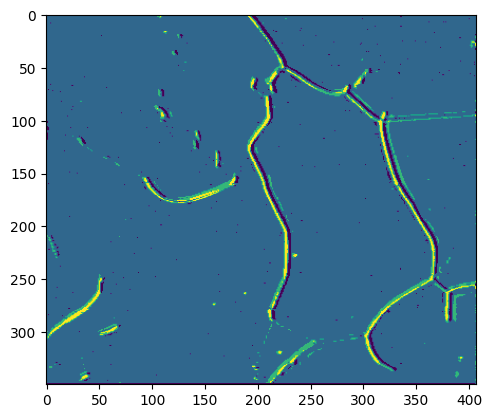

In [ ]:
segment_image(path_oxidized,n_clusters=6)

Width = 407, Height = 350
(142450, 1)
(142450, 3)


c:\Users\lb958\Code\mini_project_1\.venv\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\lb958\AppData\Local\Temp\ipykernel_4720\3060191850.py:13: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


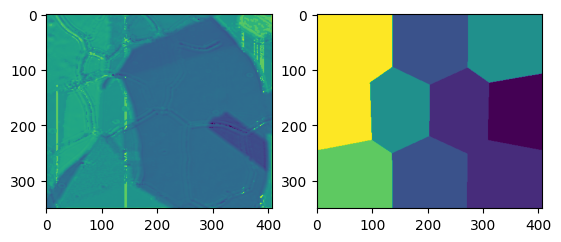

In [ ]:
segment_image(path_150C_60,10)